In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
train = pd.read_csv('hacker_train.csv')
train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,...,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,...,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,...,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,...,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,...,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Employee_ID                7000 non-null   object 
 1   Gender                     7000 non-null   object 
 2   Age                        6588 non-null   float64
 3   Education_Level            7000 non-null   int64  
 4   Relationship_Status        7000 non-null   object 
 5   Hometown                   7000 non-null   object 
 6   Unit                       7000 non-null   object 
 7   Decision_skill_possess     7000 non-null   object 
 8   Time_of_service            6856 non-null   float64
 9   Time_since_promotion       7000 non-null   int64  
 10  growth_rate                7000 non-null   int64  
 11  Travel_Rate                7000 non-null   int64  
 12  Post_Level                 7000 non-null   int64  
 13  Pay_Scale                  6991 non-null   float

In [4]:
train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

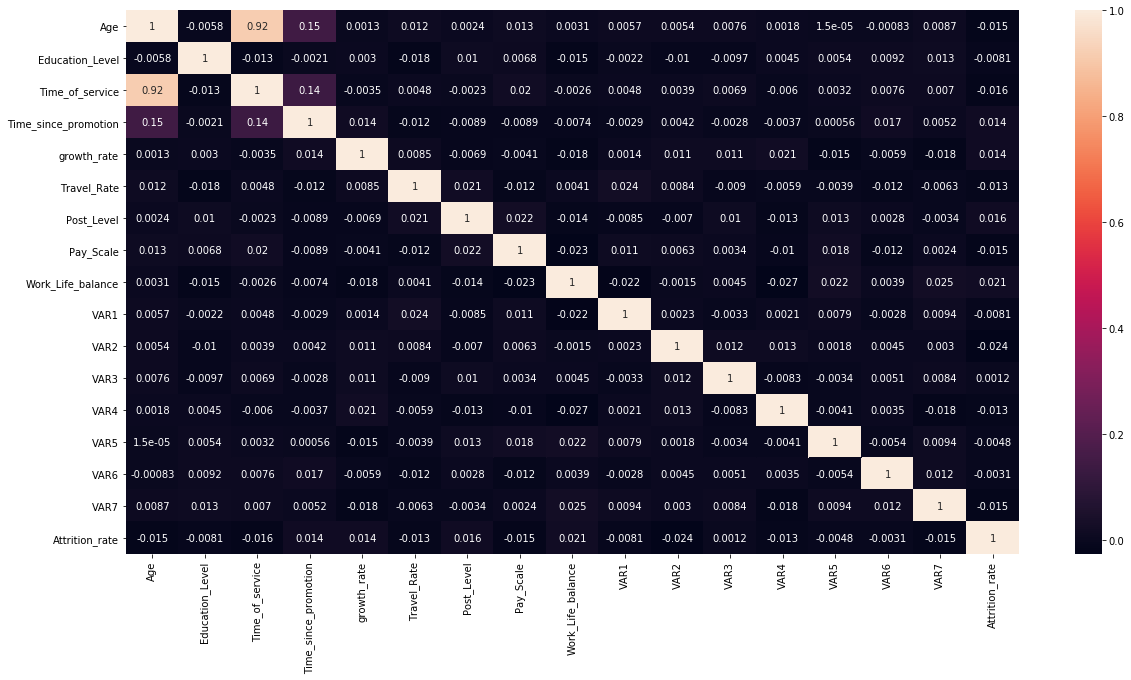

In [5]:
plt.figure(figsize = (20, 10))
sns.heatmap(train.corr(), annot = True)
plt.show()


In [6]:
#dropping age due to high corelation with time of service
train.drop('Age', axis =1 ,inplace = True)

In [7]:
#filling null values
train.Time_of_service.fillna(train.Time_of_service.mean(),inplace =True)
train.Work_Life_balance.fillna(train.Work_Life_balance.mean(),inplace =True)



In [8]:
train['Pay_Scale'].value_counts()

8.0     1392
6.0     1284
5.0     1160
4.0      983
7.0      811
9.0      464
2.0      277
3.0      255
10.0     209
1.0      156
Name: Pay_Scale, dtype: int64

In [9]:
train['VAR4'].value_counts()

2.0    4491
1.0    1272
3.0     581
Name: VAR4, dtype: int64

In [10]:
train['VAR2'].value_counts()

 0.7516    2458
-0.1048    1629
-0.9612    1047
-1.8176     816
 1.6081     473
Name: VAR2, dtype: int64

In [11]:
train["VAR2"].fillna(0.7516, inplace = True) 

In [12]:
train["VAR4"].fillna(2, inplace = True) 

In [13]:
train["Pay_Scale"].fillna(8, inplace = True) 

In [14]:
train.isnull().sum()

Employee_ID                  0
Gender                       0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [15]:
test= pd.read_csv('hacker_test.csv')
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [16]:
test.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          161
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service               52
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      3
Compensation_and_Benefits      0
Work_Life_balance              5
VAR1                           0
VAR2                         217
VAR3                           0
VAR4                         298
VAR5                           0
VAR6                           0
VAR7                           0
dtype: int64

In [17]:
#dropping age due to high corelation with time of service
test.drop('Age', axis =1 ,inplace = True)

In [18]:
#filling null values
test.Time_of_service.fillna(test.Time_of_service.mean(),inplace =True)
test.Work_Life_balance.fillna(test.Work_Life_balance.mean(),inplace =True)



In [19]:
test['Pay_Scale'].value_counts()

8.0     572
6.0     536
5.0     480
4.0     422
7.0     352
9.0     239
3.0     111
2.0     106
10.0    105
1.0      74
Name: Pay_Scale, dtype: int64

In [20]:
test["Pay_Scale"].fillna(8, inplace = True) 

In [21]:
test["VAR2"].value_counts()

 0.7516    1124
-0.1048     659
-0.9612     422
-1.8176     357
 1.6081     221
Name: VAR2, dtype: int64

In [22]:
test["VAR4"].value_counts()

2.0    1878
1.0     537
3.0     287
Name: VAR4, dtype: int64

In [23]:
test["VAR2"].fillna(0.7516, inplace = True) 

In [24]:
test["VAR4"].fillna(0.7516, inplace = True) 

In [25]:
test.isnull().sum()

Employee_ID                  0
Gender                       0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.metrics import mean_squared_error

C:\Users\vishnu reddy\Anaconda3\lib\site-packages\dask\config.py:168: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  data = yaml.load(f.read()) or {}
C:\Users\vishnu reddy\Anaconda3\lib\site-packages\dask\dataframe\utils.py:13: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
C:\Users\vishnu reddy\Anaconda3\lib\site-packages\distributed\config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [27]:
train.drop('Employee_ID',axis=1, inplace=True)
test.drop('Employee_ID',axis=1, inplace=True)

In [28]:
cat_columns = [col for col in train.columns if train[col].dtype=='O']

In [29]:
encoder = LabelEncoder()

for col in cat_columns:
    train[col] = encoder.fit_transform(train[col])
    test[col] = encoder.transform(test[col])

In [30]:
X = train.drop(['Attrition_rate'], axis=1)
y = train[['Attrition_rate']]
X_test = test
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [31]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1,
                           max_depth=1)


xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

In [32]:
rmse

0.18643613377776574

C:\Users\vishnu reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


Feature: 0, Score: 0.01583
Feature: 1, Score: 0.04777
Feature: 2, Score: 0.01727
Feature: 3, Score: 0.04722
Feature: 4, Score: 0.06674
Feature: 5, Score: 0.03674
Feature: 6, Score: 0.10292
Feature: 7, Score: 0.04080
Feature: 8, Score: 0.12084
Feature: 9, Score: 0.02807
Feature: 10, Score: 0.04590
Feature: 11, Score: 0.07039
Feature: 12, Score: 0.03607
Feature: 13, Score: 0.04300
Feature: 14, Score: 0.04218
Feature: 15, Score: 0.04280
Feature: 16, Score: 0.04119
Feature: 17, Score: 0.02318
Feature: 18, Score: 0.04150
Feature: 19, Score: 0.04642
Feature: 20, Score: 0.04315


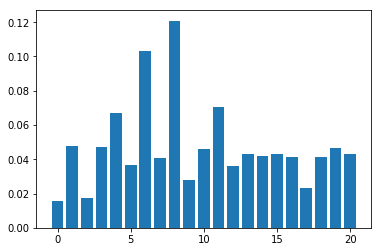

In [33]:
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
model = RandomForestRegressor()
# fit the model
model.fit(X_train, y_train)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [34]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Gender                     7000 non-null   int32  
 1   Education_Level            7000 non-null   int64  
 2   Relationship_Status        7000 non-null   int32  
 3   Hometown                   7000 non-null   int32  
 4   Unit                       7000 non-null   int32  
 5   Decision_skill_possess     7000 non-null   int32  
 6   Time_of_service            7000 non-null   float64
 7   Time_since_promotion       7000 non-null   int64  
 8   growth_rate                7000 non-null   int64  
 9   Travel_Rate                7000 non-null   int64  
 10  Post_Level                 7000 non-null   int64  
 11  Pay_Scale                  7000 non-null   float64
 12  Compensation_and_Benefits  7000 non-null   int32  
 13  Work_Life_balance          7000 non-null   float

In [35]:
#selecting top 5 features
train1 = train[['growth_rate','Time_of_service','Pay_Scale','Unit','VAR6','Attrition_rate']]
test1 = test[['growth_rate','Time_of_service','Pay_Scale','Unit','VAR6']]

In [36]:
X = train1.drop(['Attrition_rate'], axis=1)
y = train1[['Attrition_rate']]
X_test = test1
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=42, shuffle=True)

In [37]:
xgb_reg = XGBRegressor(n_estimators=100, learning_rate=0.1,
                           max_depth=1)


xgb_reg.fit(X_train, y_train)
y_pred = xgb_reg.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_pred, y_val))

In [38]:
rmse

0.1865199057912797

In [39]:
pred1= xgb_reg.predict(X_test)

In [40]:
pred1

array([0.19611111, 0.1684353 , 0.18151292, ..., 0.17529991, 0.1791353 ,
       0.20162764], dtype=float32)

In [41]:
RF_reg=RandomForestRegressor(max_depth = 1, n_estimators= 307)
RF_reg.fit(X_train,y_train)
y_pred = RF_reg.predict(X_val)
rmse3 = np.sqrt(mean_squared_error(y_pred, y_val))

C:\Users\vishnu reddy\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [42]:
rmse3

0.1865054717563881

In [43]:
RFpredict = RF_reg.predict(X_test)

In [44]:
RFpredict

array([0.19176292, 0.18622007, 0.18798984, ..., 0.18646586, 0.18373754,
       0.19369502])

In [45]:
from sklearn.linear_model import RidgeCV

ridge_cv = RidgeCV(alphas=(0.01,0.05,0.1,0.3,1,3,5,10))
y_pred1 = ridge_cv.fit(X, y)
ridge_cv_preds1=ridge_cv.predict(test1)

In [46]:
ridge_cv_preds1

array([[0.1960971 ],
       [0.18784864],
       [0.18684659],
       ...,
       [0.17984627],
       [0.17901329],
       [0.19733663]])

In [47]:
test=pd.read_csv('hacker_test.csv')
test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,...,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,...,4.0,type2,1.0,3,-0.9612,-0.4537,2.0,1,8,4
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,...,1.0,type2,1.0,4,-0.9612,0.7075,1.0,2,8,2
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,...,8.0,type3,1.0,4,-0.1048,0.7075,2.0,1,9,3
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,...,2.0,type0,4.0,3,-0.1048,0.7075,2.0,2,8,3
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,...,2.0,type2,4.0,4,1.6081,0.7075,2.0,2,7,4


In [48]:
test=test[['Employee_ID']]

In [50]:
test['Attrition_rate']=ridge_cv_preds1
test.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.196097
1,EID_9658,0.187849
2,EID_22203,0.186847
3,EID_7652,0.190553
4,EID_6516,0.200568


In [51]:
test.to_csv('finalsub_1.csv',index=False)

In [52]:
test['Attrition_rate']=RFpredict
test.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.191763
1,EID_9658,0.186220
2,EID_22203,0.187990
3,EID_7652,0.190382
4,EID_6516,0.193651


In [53]:
test.to_csv('finalsub_2.csv',index=False)

In [54]:
test['Attrition_rate']=pred1
test.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.196111
1,EID_9658,0.168435
2,EID_22203,0.181513
3,EID_7652,0.192128
4,EID_6516,0.201814


In [55]:
test.to_csv('finalsub_3.csv',index=False)

In [58]:
hyper_params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': ['l2', 'auc'],
    'learning_rate': 0.005,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.7,
    'bagging_freq': 10,
    'verbose': 0,
    "max_depth": 8,
    "num_leaves": 128,  
    "max_bin": 512,
    "num_iterations": 100000,
    "n_estimators": 1000
}

In [59]:
import lightgbm as lgb
gbm = lgb.LGBMRegressor(**hyper_params)

In [60]:
gbm.fit(X_train, y_train,
        eval_set=[(X_val, y_val)],
        eval_metric='l1',
        early_stopping_rounds=1000)

C:\Users\vishnu reddy\Anaconda3\lib\site-packages\lightgbm\engine.py:148: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[1]	valid_0's l1: 0.125494	valid_0's l2: 0.034812	valid_0's auc: 0.613019
Training until validation scores don't improve for 1000 rounds
[2]	valid_0's l1: 0.1255	valid_0's l2: 0.034812	valid_0's auc: 0.61588
[3]	valid_0's l1: 0.125505	valid_0's l2: 0.0348121	valid_0's auc: 0.579041
[4]	valid_0's l1: 0.125512	valid_0's l2: 0.0348129	valid_0's auc: 0.620887
[5]	valid_0's l1: 0.125519	valid_0's l2: 0.0348129	valid_0's auc: 0.577253
[6]	valid_0's l1: 0.125528	valid_0's l2: 0.0348136	valid_0's auc: 0.577611
[7]	valid_0's l1: 0.125535	valid_0's l2: 0.0348141	valid_0's auc: 0.577611
[8]	valid_0's l1: 0.125543	valid_0's l2: 0.0348144	valid_0's auc: 0.55794
[9]	valid_0's l1: 0.12555	valid_0's l2: 0.0348143	valid_0's auc: 0.554721
[10]	valid_0's l1: 0.125557	valid_0's l2: 0.0348152	valid_0's auc: 0.550429
[11]	valid_0's l1: 0.125557	valid_0's l2: 0.0348135	valid_0's auc: 0.600501
[12]	valid_0's l1: 0.125558	valid_0's l2: 0.0348119	valid_0's auc: 0.620172
[13]	valid_0's l1: 0.125562	valid_0's l2:

[124]	valid_0's l1: 0.126259	valid_0's l2: 0.0348504	valid_0's auc: 0.528255
[125]	valid_0's l1: 0.12626	valid_0's l2: 0.0348503	valid_0's auc: 0.533262
[126]	valid_0's l1: 0.126268	valid_0's l2: 0.0348505	valid_0's auc: 0.536123
[127]	valid_0's l1: 0.126268	valid_0's l2: 0.0348505	valid_0's auc: 0.542203
[128]	valid_0's l1: 0.126276	valid_0's l2: 0.0348508	valid_0's auc: 0.546853
[129]	valid_0's l1: 0.126277	valid_0's l2: 0.0348509	valid_0's auc: 0.552217
[130]	valid_0's l1: 0.126282	valid_0's l2: 0.0348515	valid_0's auc: 0.551144
[131]	valid_0's l1: 0.126283	valid_0's l2: 0.0348494	valid_0's auc: 0.555436
[132]	valid_0's l1: 0.126284	valid_0's l2: 0.0348474	valid_0's auc: 0.560086
[133]	valid_0's l1: 0.126286	valid_0's l2: 0.0348454	valid_0's auc: 0.562589
[134]	valid_0's l1: 0.126287	valid_0's l2: 0.0348435	valid_0's auc: 0.567597
[135]	valid_0's l1: 0.126288	valid_0's l2: 0.0348424	valid_0's auc: 0.570815
[136]	valid_0's l1: 0.126289	valid_0's l2: 0.0348406	valid_0's auc: 0.571531


[268]	valid_0's l1: 0.126921	valid_0's l2: 0.0350841	valid_0's auc: 0.452432
[269]	valid_0's l1: 0.126932	valid_0's l2: 0.0350867	valid_0's auc: 0.453147
[270]	valid_0's l1: 0.126935	valid_0's l2: 0.0350879	valid_0's auc: 0.453147
[271]	valid_0's l1: 0.126927	valid_0's l2: 0.0350865	valid_0's auc: 0.454578
[272]	valid_0's l1: 0.126924	valid_0's l2: 0.0350867	valid_0's auc: 0.453147
[273]	valid_0's l1: 0.126922	valid_0's l2: 0.035087	valid_0's auc: 0.452074
[274]	valid_0's l1: 0.126921	valid_0's l2: 0.0350873	valid_0's auc: 0.451001
[275]	valid_0's l1: 0.12692	valid_0's l2: 0.0350877	valid_0's auc: 0.452432
[276]	valid_0's l1: 0.126915	valid_0's l2: 0.035087	valid_0's auc: 0.453147
[277]	valid_0's l1: 0.126915	valid_0's l2: 0.0350875	valid_0's auc: 0.450286
[278]	valid_0's l1: 0.126914	valid_0's l2: 0.0350882	valid_0's auc: 0.447783
[279]	valid_0's l1: 0.126914	valid_0's l2: 0.0350892	valid_0's auc: 0.447067
[280]	valid_0's l1: 0.126914	valid_0's l2: 0.0350899	valid_0's auc: 0.445637
[2

[418]	valid_0's l1: 0.127685	valid_0's l2: 0.0352767	valid_0's auc: 0.376252
[419]	valid_0's l1: 0.127688	valid_0's l2: 0.0352786	valid_0's auc: 0.376967
[420]	valid_0's l1: 0.127696	valid_0's l2: 0.035281	valid_0's auc: 0.378755
[421]	valid_0's l1: 0.127705	valid_0's l2: 0.0352825	valid_0's auc: 0.377325
[422]	valid_0's l1: 0.127718	valid_0's l2: 0.0352841	valid_0's auc: 0.37804
[423]	valid_0's l1: 0.127732	valid_0's l2: 0.0352868	valid_0's auc: 0.378398
[424]	valid_0's l1: 0.127744	valid_0's l2: 0.0352885	valid_0's auc: 0.378755
[425]	valid_0's l1: 0.127756	valid_0's l2: 0.0352912	valid_0's auc: 0.380186
[426]	valid_0's l1: 0.127768	valid_0's l2: 0.0352941	valid_0's auc: 0.381259
[427]	valid_0's l1: 0.127782	valid_0's l2: 0.0352975	valid_0's auc: 0.381617
[428]	valid_0's l1: 0.127795	valid_0's l2: 0.0352994	valid_0's auc: 0.381617
[429]	valid_0's l1: 0.127809	valid_0's l2: 0.0353028	valid_0's auc: 0.381617
[430]	valid_0's l1: 0.127822	valid_0's l2: 0.0353048	valid_0's auc: 0.381617
[

[560]	valid_0's l1: 0.128146	valid_0's l2: 0.0353831	valid_0's auc: 0.38412
[561]	valid_0's l1: 0.128163	valid_0's l2: 0.0353887	valid_0's auc: 0.384478
[562]	valid_0's l1: 0.128181	valid_0's l2: 0.0353944	valid_0's auc: 0.38412
[563]	valid_0's l1: 0.128197	valid_0's l2: 0.0353994	valid_0's auc: 0.38412
[564]	valid_0's l1: 0.128209	valid_0's l2: 0.0354037	valid_0's auc: 0.385908
[565]	valid_0's l1: 0.128221	valid_0's l2: 0.0354073	valid_0's auc: 0.38877
[566]	valid_0's l1: 0.128233	valid_0's l2: 0.035411	valid_0's auc: 0.3902
[567]	valid_0's l1: 0.128245	valid_0's l2: 0.0354147	valid_0's auc: 0.390558
[568]	valid_0's l1: 0.128256	valid_0's l2: 0.0354187	valid_0's auc: 0.391273
[569]	valid_0's l1: 0.128268	valid_0's l2: 0.0354225	valid_0's auc: 0.392346
[570]	valid_0's l1: 0.128277	valid_0's l2: 0.0354251	valid_0's auc: 0.394134
[571]	valid_0's l1: 0.128275	valid_0's l2: 0.0354253	valid_0's auc: 0.392346
[572]	valid_0's l1: 0.128274	valid_0's l2: 0.0354256	valid_0's auc: 0.391989
[573]	

[713]	valid_0's l1: 0.128906	valid_0's l2: 0.0355716	valid_0's auc: 0.373033
[714]	valid_0's l1: 0.128903	valid_0's l2: 0.0355703	valid_0's auc: 0.373748
[715]	valid_0's l1: 0.128902	valid_0's l2: 0.0355709	valid_0's auc: 0.373033
[716]	valid_0's l1: 0.1289	valid_0's l2: 0.0355697	valid_0's auc: 0.373033
[717]	valid_0's l1: 0.128899	valid_0's l2: 0.0355704	valid_0's auc: 0.37196
[718]	valid_0's l1: 0.1289	valid_0's l2: 0.0355703	valid_0's auc: 0.372318
[719]	valid_0's l1: 0.128897	valid_0's l2: 0.0355704	valid_0's auc: 0.372318
[720]	valid_0's l1: 0.128897	valid_0's l2: 0.0355706	valid_0's auc: 0.372675
[721]	valid_0's l1: 0.128901	valid_0's l2: 0.0355693	valid_0's auc: 0.370887
[722]	valid_0's l1: 0.128904	valid_0's l2: 0.0355683	valid_0's auc: 0.371602
[723]	valid_0's l1: 0.128908	valid_0's l2: 0.0355671	valid_0's auc: 0.372675
[724]	valid_0's l1: 0.128916	valid_0's l2: 0.0355678	valid_0's auc: 0.374106
[725]	valid_0's l1: 0.128918	valid_0's l2: 0.0355668	valid_0's auc: 0.374821
[726

[841]	valid_0's l1: 0.129319	valid_0's l2: 0.0356952	valid_0's auc: 0.399499
[842]	valid_0's l1: 0.129322	valid_0's l2: 0.0356932	valid_0's auc: 0.398426
[843]	valid_0's l1: 0.129324	valid_0's l2: 0.035691	valid_0's auc: 0.396638
[844]	valid_0's l1: 0.129326	valid_0's l2: 0.0356892	valid_0's auc: 0.394134
[845]	valid_0's l1: 0.129328	valid_0's l2: 0.0356871	valid_0's auc: 0.391989
[846]	valid_0's l1: 0.12933	valid_0's l2: 0.0356852	valid_0's auc: 0.3902
[847]	valid_0's l1: 0.129333	valid_0's l2: 0.0356849	valid_0's auc: 0.3902
[848]	valid_0's l1: 0.129335	valid_0's l2: 0.0356831	valid_0's auc: 0.386981
[849]	valid_0's l1: 0.129337	valid_0's l2: 0.0356828	valid_0's auc: 0.386266
[850]	valid_0's l1: 0.129341	valid_0's l2: 0.0356812	valid_0's auc: 0.382332
[851]	valid_0's l1: 0.129338	valid_0's l2: 0.0356802	valid_0's auc: 0.38269
[852]	valid_0's l1: 0.129336	valid_0's l2: 0.0356792	valid_0's auc: 0.383047
[853]	valid_0's l1: 0.129333	valid_0's l2: 0.0356776	valid_0's auc: 0.383405
[854]	

[958]	valid_0's l1: 0.129785	valid_0's l2: 0.035829	valid_0's auc: 0.358369
[959]	valid_0's l1: 0.129788	valid_0's l2: 0.0358293	valid_0's auc: 0.358727
[960]	valid_0's l1: 0.12979	valid_0's l2: 0.0358298	valid_0's auc: 0.3598
[961]	valid_0's l1: 0.129795	valid_0's l2: 0.0358307	valid_0's auc: 0.357654
[962]	valid_0's l1: 0.1298	valid_0's l2: 0.0358318	valid_0's auc: 0.356223
[963]	valid_0's l1: 0.129804	valid_0's l2: 0.0358329	valid_0's auc: 0.355508
[964]	valid_0's l1: 0.129809	valid_0's l2: 0.035834	valid_0's auc: 0.35372
[965]	valid_0's l1: 0.129814	valid_0's l2: 0.0358352	valid_0's auc: 0.353004
[966]	valid_0's l1: 0.129819	valid_0's l2: 0.0358364	valid_0's auc: 0.352647
[967]	valid_0's l1: 0.129823	valid_0's l2: 0.0358377	valid_0's auc: 0.351574
[968]	valid_0's l1: 0.129828	valid_0's l2: 0.0358391	valid_0's auc: 0.351931
[969]	valid_0's l1: 0.129834	valid_0's l2: 0.0358406	valid_0's auc: 0.351216
[970]	valid_0's l1: 0.12984	valid_0's l2: 0.0358422	valid_0's auc: 0.349428
[971]	va

LGBMRegressor(bagging_fraction=0.7, bagging_freq=10, feature_fraction=0.9,
              learning_rate=0.005, max_bin=512, max_depth=8,
              metric=['l2', 'auc'], n_estimators=1000, num_iterations=100000,
              num_leaves=128, objective='regression', task='train', verbose=0)

In [61]:
y_pred = gbm.predict(X_train, num_iteration=gbm.best_iteration_)

In [62]:
from sklearn.metrics import mean_squared_log_error
print('The rmse of prediction is:', round(mean_squared_log_error(y_pred, y_train) ** 0.5, 5))

The rmse of prediction is: 0.13892


In [63]:
y_pred1 = gbm.predict(X_test, num_iteration=gbm.best_iteration_)

In [64]:
y_pred1

array([0.18940439, 0.18929674, 0.18975102, ..., 0.18929674, 0.18942795,
       0.18908028])

In [77]:
test['Attrition_rate']=pred3
test.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.195036
1,EID_9658,0.167896
2,EID_22203,0.178455
3,EID_7652,0.196991
4,EID_6516,0.201650


In [78]:
test.to_csv('finalsub_12.csv',index=False)

In [68]:
pred2 =(pred1+y_pred1)/2

In [71]:
from catboost import CatBoostRegressor
cat_reg= CatBoostRegressor(learning_rate=0.1, max_depth=1)

cat_reg.fit(X_train, y_train)
y_pred = cat_reg.predict(X_val)
rmse55 = np.sqrt(mean_squared_error(y_pred, y_val))

0:	learn: 0.1855292	total: 87.1ms	remaining: 1m 26s
1:	learn: 0.1855125	total: 88.6ms	remaining: 44.2s
2:	learn: 0.1854989	total: 89.6ms	remaining: 29.8s
3:	learn: 0.1854970	total: 90.7ms	remaining: 22.6s
4:	learn: 0.1854890	total: 91.7ms	remaining: 18.2s
5:	learn: 0.1854800	total: 92.8ms	remaining: 15.4s
6:	learn: 0.1854756	total: 93.8ms	remaining: 13.3s
7:	learn: 0.1854752	total: 94.9ms	remaining: 11.8s
8:	learn: 0.1854752	total: 96.1ms	remaining: 10.6s
9:	learn: 0.1854642	total: 97.3ms	remaining: 9.63s
10:	learn: 0.1854534	total: 99.6ms	remaining: 8.96s
11:	learn: 0.1854499	total: 101ms	remaining: 8.31s
12:	learn: 0.1854484	total: 102ms	remaining: 7.73s
13:	learn: 0.1854405	total: 103ms	remaining: 7.24s
14:	learn: 0.1854401	total: 104ms	remaining: 6.8s
15:	learn: 0.1854359	total: 104ms	remaining: 6.42s
16:	learn: 0.1854310	total: 105ms	remaining: 6.09s
17:	learn: 0.1854232	total: 106ms	remaining: 5.79s
18:	learn: 0.1854158	total: 107ms	remaining: 5.53s
19:	learn: 0.1854115	total: 10

240:	learn: 0.1848899	total: 370ms	remaining: 1.17s
241:	learn: 0.1848883	total: 375ms	remaining: 1.18s
242:	learn: 0.1848871	total: 381ms	remaining: 1.19s
243:	learn: 0.1848855	total: 382ms	remaining: 1.18s
244:	learn: 0.1848841	total: 383ms	remaining: 1.18s
245:	learn: 0.1848827	total: 384ms	remaining: 1.18s
246:	learn: 0.1848815	total: 385ms	remaining: 1.17s
247:	learn: 0.1848797	total: 389ms	remaining: 1.18s
248:	learn: 0.1848790	total: 391ms	remaining: 1.18s
249:	learn: 0.1848775	total: 392ms	remaining: 1.18s
250:	learn: 0.1848762	total: 393ms	remaining: 1.17s
251:	learn: 0.1848748	total: 394ms	remaining: 1.17s
252:	learn: 0.1848733	total: 395ms	remaining: 1.17s
253:	learn: 0.1848719	total: 396ms	remaining: 1.16s
254:	learn: 0.1848707	total: 397ms	remaining: 1.16s
255:	learn: 0.1848701	total: 401ms	remaining: 1.17s
256:	learn: 0.1848689	total: 403ms	remaining: 1.16s
257:	learn: 0.1848674	total: 405ms	remaining: 1.16s
258:	learn: 0.1848664	total: 406ms	remaining: 1.16s
259:	learn: 

471:	learn: 0.1846764	total: 646ms	remaining: 723ms
472:	learn: 0.1846759	total: 647ms	remaining: 721ms
473:	learn: 0.1846754	total: 648ms	remaining: 719ms
474:	learn: 0.1846749	total: 649ms	remaining: 718ms
475:	learn: 0.1846744	total: 650ms	remaining: 716ms
476:	learn: 0.1846734	total: 651ms	remaining: 714ms
477:	learn: 0.1846726	total: 652ms	remaining: 712ms
478:	learn: 0.1846719	total: 653ms	remaining: 710ms
479:	learn: 0.1846712	total: 654ms	remaining: 708ms
480:	learn: 0.1846705	total: 654ms	remaining: 706ms
481:	learn: 0.1846701	total: 655ms	remaining: 704ms
482:	learn: 0.1846692	total: 656ms	remaining: 702ms
483:	learn: 0.1846685	total: 657ms	remaining: 701ms
484:	learn: 0.1846678	total: 658ms	remaining: 699ms
485:	learn: 0.1846670	total: 659ms	remaining: 697ms
486:	learn: 0.1846663	total: 660ms	remaining: 695ms
487:	learn: 0.1846655	total: 661ms	remaining: 693ms
488:	learn: 0.1846652	total: 661ms	remaining: 691ms
489:	learn: 0.1846645	total: 662ms	remaining: 689ms
490:	learn: 

638:	learn: 0.1845935	total: 794ms	remaining: 448ms
639:	learn: 0.1845931	total: 795ms	remaining: 447ms
640:	learn: 0.1845930	total: 796ms	remaining: 446ms
641:	learn: 0.1845926	total: 797ms	remaining: 444ms
642:	learn: 0.1845921	total: 797ms	remaining: 443ms
643:	learn: 0.1845917	total: 798ms	remaining: 441ms
644:	learn: 0.1845912	total: 799ms	remaining: 440ms
645:	learn: 0.1845909	total: 800ms	remaining: 438ms
646:	learn: 0.1845905	total: 801ms	remaining: 437ms
647:	learn: 0.1845900	total: 802ms	remaining: 436ms
648:	learn: 0.1845896	total: 803ms	remaining: 434ms
649:	learn: 0.1845894	total: 804ms	remaining: 433ms
650:	learn: 0.1845890	total: 804ms	remaining: 431ms
651:	learn: 0.1845886	total: 805ms	remaining: 430ms
652:	learn: 0.1845883	total: 806ms	remaining: 428ms
653:	learn: 0.1845880	total: 807ms	remaining: 427ms
654:	learn: 0.1845875	total: 808ms	remaining: 426ms
655:	learn: 0.1845873	total: 809ms	remaining: 424ms
656:	learn: 0.1845871	total: 810ms	remaining: 423ms
657:	learn: 

796:	learn: 0.1845420	total: 937ms	remaining: 239ms
797:	learn: 0.1845417	total: 938ms	remaining: 238ms
798:	learn: 0.1845413	total: 939ms	remaining: 236ms
799:	learn: 0.1845410	total: 940ms	remaining: 235ms
800:	learn: 0.1845408	total: 941ms	remaining: 234ms
801:	learn: 0.1845405	total: 942ms	remaining: 233ms
802:	learn: 0.1845401	total: 943ms	remaining: 231ms
803:	learn: 0.1845398	total: 944ms	remaining: 230ms
804:	learn: 0.1845397	total: 944ms	remaining: 229ms
805:	learn: 0.1845393	total: 945ms	remaining: 228ms
806:	learn: 0.1845390	total: 946ms	remaining: 226ms
807:	learn: 0.1845387	total: 947ms	remaining: 225ms
808:	learn: 0.1845383	total: 948ms	remaining: 224ms
809:	learn: 0.1845381	total: 949ms	remaining: 223ms
810:	learn: 0.1845377	total: 950ms	remaining: 221ms
811:	learn: 0.1845373	total: 951ms	remaining: 220ms
812:	learn: 0.1845370	total: 951ms	remaining: 219ms
813:	learn: 0.1845368	total: 952ms	remaining: 218ms
814:	learn: 0.1845364	total: 953ms	remaining: 216ms
815:	learn: 

954:	learn: 0.1844981	total: 1.08s	remaining: 51.1ms
955:	learn: 0.1844978	total: 1.09s	remaining: 50ms
956:	learn: 0.1844974	total: 1.09s	remaining: 48.9ms
957:	learn: 0.1844971	total: 1.09s	remaining: 47.7ms
958:	learn: 0.1844968	total: 1.09s	remaining: 46.6ms
959:	learn: 0.1844964	total: 1.09s	remaining: 45.4ms
960:	learn: 0.1844961	total: 1.09s	remaining: 44.3ms
961:	learn: 0.1844958	total: 1.09s	remaining: 43.2ms
962:	learn: 0.1844954	total: 1.09s	remaining: 42ms
963:	learn: 0.1844951	total: 1.09s	remaining: 40.9ms
964:	learn: 0.1844950	total: 1.1s	remaining: 39.8ms
965:	learn: 0.1844949	total: 1.1s	remaining: 38.6ms
966:	learn: 0.1844948	total: 1.1s	remaining: 37.5ms
967:	learn: 0.1844944	total: 1.1s	remaining: 36.4ms
968:	learn: 0.1844940	total: 1.1s	remaining: 35.2ms
969:	learn: 0.1844937	total: 1.1s	remaining: 34.1ms
970:	learn: 0.1844935	total: 1.1s	remaining: 33ms
971:	learn: 0.1844932	total: 1.1s	remaining: 31.8ms
972:	learn: 0.1844929	total: 1.1s	remaining: 30.7ms
973:	lea

In [72]:
cat_reg.fit(X, y)
predict11 = cat_reg.predict(X_test)

0:	learn: 0.1857384	total: 1.24ms	remaining: 1.24s
1:	learn: 0.1857300	total: 2.42ms	remaining: 1.21s
2:	learn: 0.1857148	total: 3.61ms	remaining: 1.2s
3:	learn: 0.1857024	total: 4.7ms	remaining: 1.17s
4:	learn: 0.1856895	total: 5.85ms	remaining: 1.16s
5:	learn: 0.1856773	total: 8.87ms	remaining: 1.47s
6:	learn: 0.1856743	total: 10.2ms	remaining: 1.45s
7:	learn: 0.1856710	total: 11.4ms	remaining: 1.41s
8:	learn: 0.1856696	total: 12.5ms	remaining: 1.38s
9:	learn: 0.1856600	total: 13.7ms	remaining: 1.36s
10:	learn: 0.1856552	total: 14.9ms	remaining: 1.34s
11:	learn: 0.1856530	total: 16ms	remaining: 1.32s
12:	learn: 0.1856528	total: 17.2ms	remaining: 1.31s
13:	learn: 0.1856462	total: 18.4ms	remaining: 1.29s
14:	learn: 0.1856454	total: 19.6ms	remaining: 1.29s
15:	learn: 0.1856418	total: 20.8ms	remaining: 1.28s
16:	learn: 0.1856388	total: 22.1ms	remaining: 1.27s
17:	learn: 0.1856355	total: 23.2ms	remaining: 1.26s
18:	learn: 0.1856347	total: 24.4ms	remaining: 1.26s
19:	learn: 0.1856323	total

230:	learn: 0.1852274	total: 279ms	remaining: 929ms
231:	learn: 0.1852267	total: 281ms	remaining: 929ms
232:	learn: 0.1852261	total: 282ms	remaining: 927ms
233:	learn: 0.1852256	total: 283ms	remaining: 925ms
234:	learn: 0.1852242	total: 284ms	remaining: 924ms
235:	learn: 0.1852231	total: 285ms	remaining: 922ms
236:	learn: 0.1852221	total: 286ms	remaining: 920ms
237:	learn: 0.1852212	total: 287ms	remaining: 920ms
238:	learn: 0.1852198	total: 289ms	remaining: 919ms
239:	learn: 0.1852186	total: 290ms	remaining: 917ms
240:	learn: 0.1852177	total: 291ms	remaining: 916ms
241:	learn: 0.1852166	total: 292ms	remaining: 915ms
242:	learn: 0.1852158	total: 293ms	remaining: 914ms
243:	learn: 0.1852148	total: 294ms	remaining: 912ms
244:	learn: 0.1852135	total: 296ms	remaining: 911ms
245:	learn: 0.1852125	total: 297ms	remaining: 910ms
246:	learn: 0.1852113	total: 298ms	remaining: 909ms
247:	learn: 0.1852104	total: 300ms	remaining: 909ms
248:	learn: 0.1852096	total: 301ms	remaining: 907ms
249:	learn: 

482:	learn: 0.1850566	total: 571ms	remaining: 611ms
483:	learn: 0.1850562	total: 572ms	remaining: 610ms
484:	learn: 0.1850559	total: 573ms	remaining: 609ms
485:	learn: 0.1850555	total: 575ms	remaining: 608ms
486:	learn: 0.1850550	total: 576ms	remaining: 607ms
487:	learn: 0.1850546	total: 577ms	remaining: 605ms
488:	learn: 0.1850539	total: 578ms	remaining: 604ms
489:	learn: 0.1850536	total: 579ms	remaining: 603ms
490:	learn: 0.1850532	total: 580ms	remaining: 602ms
491:	learn: 0.1850528	total: 582ms	remaining: 600ms
492:	learn: 0.1850525	total: 583ms	remaining: 599ms
493:	learn: 0.1850518	total: 584ms	remaining: 598ms
494:	learn: 0.1850515	total: 585ms	remaining: 597ms
495:	learn: 0.1850510	total: 586ms	remaining: 596ms
496:	learn: 0.1850507	total: 587ms	remaining: 595ms
497:	learn: 0.1850502	total: 591ms	remaining: 596ms
498:	learn: 0.1850500	total: 593ms	remaining: 595ms
499:	learn: 0.1850498	total: 594ms	remaining: 594ms
500:	learn: 0.1850495	total: 595ms	remaining: 593ms
501:	learn: 

714:	learn: 0.1849746	total: 859ms	remaining: 343ms
715:	learn: 0.1849744	total: 861ms	remaining: 341ms
716:	learn: 0.1849741	total: 862ms	remaining: 340ms
717:	learn: 0.1849738	total: 863ms	remaining: 339ms
718:	learn: 0.1849734	total: 864ms	remaining: 338ms
719:	learn: 0.1849730	total: 866ms	remaining: 337ms
720:	learn: 0.1849725	total: 867ms	remaining: 335ms
721:	learn: 0.1849724	total: 868ms	remaining: 334ms
722:	learn: 0.1849722	total: 869ms	remaining: 333ms
723:	learn: 0.1849720	total: 870ms	remaining: 332ms
724:	learn: 0.1849717	total: 872ms	remaining: 331ms
725:	learn: 0.1849715	total: 873ms	remaining: 329ms
726:	learn: 0.1849713	total: 874ms	remaining: 328ms
727:	learn: 0.1849710	total: 875ms	remaining: 327ms
728:	learn: 0.1849707	total: 876ms	remaining: 326ms
729:	learn: 0.1849702	total: 878ms	remaining: 325ms
730:	learn: 0.1849699	total: 879ms	remaining: 323ms
731:	learn: 0.1849695	total: 880ms	remaining: 322ms
732:	learn: 0.1849691	total: 881ms	remaining: 321ms
733:	learn: 

951:	learn: 0.1849124	total: 1.15s	remaining: 58.1ms
952:	learn: 0.1849122	total: 1.15s	remaining: 56.9ms
953:	learn: 0.1849119	total: 1.16s	remaining: 55.7ms
954:	learn: 0.1849117	total: 1.16s	remaining: 54.5ms
955:	learn: 0.1849114	total: 1.16s	remaining: 53.3ms
956:	learn: 0.1849112	total: 1.16s	remaining: 52.1ms
957:	learn: 0.1849109	total: 1.16s	remaining: 50.8ms
958:	learn: 0.1849107	total: 1.16s	remaining: 49.7ms
959:	learn: 0.1849103	total: 1.16s	remaining: 48.5ms
960:	learn: 0.1849101	total: 1.17s	remaining: 47.3ms
961:	learn: 0.1849099	total: 1.17s	remaining: 46.1ms
962:	learn: 0.1849098	total: 1.17s	remaining: 44.9ms
963:	learn: 0.1849096	total: 1.17s	remaining: 43.7ms
964:	learn: 0.1849095	total: 1.17s	remaining: 42.4ms
965:	learn: 0.1849093	total: 1.17s	remaining: 41.2ms
966:	learn: 0.1849092	total: 1.17s	remaining: 40ms
967:	learn: 0.1849090	total: 1.17s	remaining: 38.8ms
968:	learn: 0.1849088	total: 1.18s	remaining: 37.6ms
969:	learn: 0.1849087	total: 1.18s	remaining: 36

In [73]:
predict11

array([0.19959149, 0.14595453, 0.16410134, ..., 0.1567753 , 0.17202073,
       0.21122919])

In [76]:
pred3 =(pred1+y_pred1+predict11)/3

In [79]:
prd4 = (ridge_cv_preds1+predict11)/2

In [80]:
prd4

array([[0.19784429, 0.17102581, 0.18009922, ..., 0.1764362 , 0.18405891,
        0.20366314],
       [0.19372006, 0.16690158, 0.17597499, ..., 0.17231197, 0.17993468,
        0.19953891],
       [0.19321904, 0.16640056, 0.17547396, ..., 0.17181094, 0.17943366,
        0.19903789],
       ...,
       [0.18971888, 0.1629004 , 0.17197381, ..., 0.16831078, 0.1759335 ,
        0.19553773],
       [0.18930239, 0.16248391, 0.17155731, ..., 0.16789429, 0.17551701,
        0.19512124],
       [0.19846406, 0.17164558, 0.18071899, ..., 0.17705596, 0.18467868,
        0.20428291]])